 # Steps in Machine Learning and model building
    1- Data Preprocessing
    2- train test data
    3- Algorithm setup
    4- Model fitting
    5- Prediction
    6- Model Evaluate
    7- Model export

# Step-1 Data Processing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [4]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
x = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [9]:
x.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018634F42DD8>,
      dtype=object)

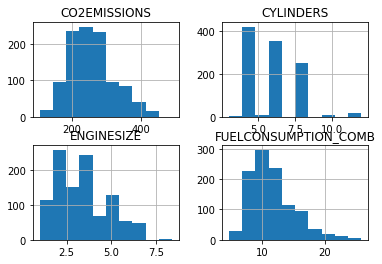

In [10]:
x.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186352BEB00>]],
      dtype=object)

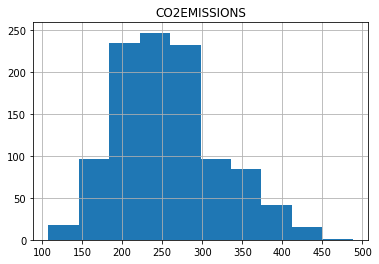

In [11]:
x.hist('CO2EMISSIONS')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000186353A1E80>]],
      dtype=object)

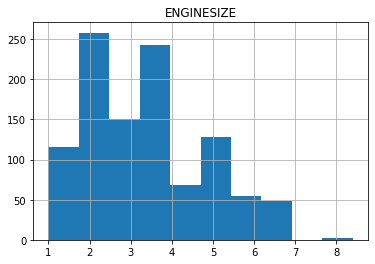

In [12]:
x.hist('ENGINESIZE')

# Step-2 Train Test Data

In [24]:
ndf = np.random.rand(len(df))<0.8
train = x[ndf]
test = x[~ndf]                     
                     

In [25]:
len(train)

874

In [26]:
len(test)

193

In [35]:
train_x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

# Step-3 Algorithm Setup

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr = LinearRegression()

# Step-4 Model Fitting

In [36]:
lr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lr.coef_

array([[10.73806776,  7.54953102,  9.52986505]])

In [38]:
lr.intercept_

array([66.2798383])

# Step-5 Prediction

In [45]:
test_x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

In [46]:
yhat = lr.predict(test_x)

In [47]:
yhat[0:5]

array([[368.89470512],
       [323.9049267 ],
       [368.89470512],
       [206.58184286],
       [222.88910762]])

In [49]:
print("Residual sum of squares: %.2f"
      % np.mean((yhat - test_y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % lr.score(test_x, test_y))

Residual sum of squares: 592.88
Variance score: 0.86
